In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Importing dataset

In [2]:
df = pd.read_csv('Fish.csv')
df.shape

(159, 7)

In [3]:
display(df)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Exploratory Data Analysis

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Species,0,0.0
Weight,0,0.0
Length1,0,0.0
Length2,0,0.0
Length3,0,0.0
Height,0,0.0
Width,0,0.0


In [5]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


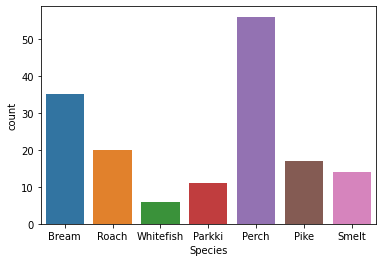

In [6]:
sns.countplot(df['Species'])
plt.show()

##Feature Extraction

In [7]:
feature_names = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
X = df[feature_names]
y = df['Species']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

##Model Evaluation

In [9]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma='auto', class_weight='balanced')))

In [10]:
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.479385 (0.082503)
CART: 0.748000 (0.046769)
SVC: 0.472615 (0.026866)


## Building Support Vector Machine & Predicting

In [11]:
svc = SVC(gamma='auto', class_weight='balanced')
clf = svc.fit(X_train, y_train)


In [12]:
y_prediction = svc.predict(X_test)
print(f" Model Accuracy {accuracy_score(y_test, y_prediction)}")

 Model Accuracy 0.59375


##Save Model

In [13]:
import pickle
pickle_out = open("svc_fishClassifier.pkl","wb")
pickle.dump(svc,pickle_out)
pickle_out.close()

##Load Model and Predict

In [14]:
 # Load the model from disk
loaded_model = pickle.load(open("svc_fishClassifier.pkl", 'rb'))

In [15]:
test_prediction = (loaded_model.predict([[150, 20, 22, 24, 5, 3]]))
print(f" Prediction likely to be a {test_prediction}")

 Prediction likely to be a ['Roach']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
